In [2]:
# chargement des bases de données

import pandas as pd
from sklearn.preprocessing import StandardScaler

#  Charger les données d'entraînement
X_train_A1 = pd.read_csv("datasets/X_train_A1_raw.csv")
y_train_A1 = pd.read_csv("datasets/y_train_A1_raw.csv").values.ravel()

X_train_A2 = pd.read_csv("datasets/X_train_A2_scaled.csv")

X_train_B1 = pd.read_csv("datasets/X_train_B1_smote.csv")
y_train_B1 = pd.read_csv("datasets/y_train_B1_smote.csv").values.ravel()

X_train_B2 = pd.read_csv("datasets/X_train_B2_smote_scaled.csv")
y_train_B2_smote = y_train_B1   # même y que B1

#  Charger les jeux de test
X_test_raw = pd.read_csv("datasets/X_test_raw.csv")
X_test_scaled = pd.read_csv("datasets/X_test_scaled.csv")
y_test = pd.read_csv("datasets/y_test.csv").values.ravel()

print("✔ Données rechargées avec succès !")
print("Taille A1 :", X_train_A1.shape)
print("Taille A2 :", X_train_A2.shape)
print("Taille B1 :", X_train_B1.shape)
print("Taille B2 :", X_train_B2.shape)


✔ Données rechargées avec succès !
Taille A1 : (3391, 15)
Taille A2 : (3391, 15)
Taille B1 : (5752, 15)
Taille B2 : (5752, 15)


In [3]:
#####        entraînement des modèles        #####

#####        LOGISTIC REGRESSION (A1, A2, B1, B2)  #####

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    confusion_matrix, classification_report
)
import pandas as pd

# ------------------------------------------------------------
# 🔧 Fonction d'évaluation (stable, claire, complète)
# ------------------------------------------------------------
def eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (classe 1)": recall_score(y_test, y_pred),
        "Precision (classe 1)": precision_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob),
        "AUC-PR": average_precision_score(y_test, y_prob),
        "Brier score": brier_score_loss(y_test, y_prob),
        "Confusion matrix": confusion_matrix(y_test, y_pred),
        "Classification report": classification_report(y_test, y_pred)
    }
    return results

# Paramètres professionnels de régression logistique
log_params = {
    "max_iter": 1000,
    "solver": "lbfgs",
    "penalty": "l2",
    "C": 1.0
}

# ------------------------------------------------------------
#  1) Logistic Regression — A1 (brut)
# ------------------------------------------------------------
log_A1 = LogisticRegression(**log_params)
log_A1.fit(X_train_A1, y_train_A1)
results_A1 = eval_model(log_A1, X_test_raw, y_test)

# ------------------------------------------------------------
#  2) Logistic Regression — A2 (scaled)
# ------------------------------------------------------------
log_A2 = LogisticRegression(**log_params)
log_A2.fit(X_train_A2, y_train_A1)
results_A2 = eval_model(log_A2, X_test_scaled, y_test)

# ------------------------------------------------------------
#  3) Logistic Regression — B1 (SMOTE)
# ------------------------------------------------------------
log_B1 = LogisticRegression(**log_params)
log_B1.fit(X_train_B1, y_train_B1)
results_B1 = eval_model(log_B1, X_test_raw, y_test)

# ------------------------------------------------------------
#  4) Logistic Regression — B2 (SMOTE + scaling)
# ------------------------------------------------------------
log_B2 = LogisticRegression(**log_params)
log_B2.fit(X_train_B2, y_train_B2_smote)
results_B2 = eval_model(log_B2, X_test_scaled, y_test)

# ------------------------------------------------------------
#  Résumé complet pour Logistic Regression
# ------------------------------------------------------------
logistic_results = pd.DataFrame({
    "A1 (brut)": results_A1,
    "A2 (scaled)": results_A2,
    "B1 (SMOTE)": results_B1,
    "B2 (SMOTE + scaling)": results_B2
})

logistic_results


c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    h

,A1 (brut),A2 (scaled),B1 (SMOTE),B2 (SMOTE + scaling)
Accuracy,0.851415,0.850236,0.637972,0.569575
Recall (classe 1),0.046512,0.054264,0.589147,0.728682
Precision (classe 1),0.666667,0.583333,0.230303,0.221698
F1-score,0.086957,0.099291,0.331155,0.339964
AUC-ROC,0.694127,0.692046,0.683949,0.681826
AUC-PR,0.32242,0.314711,0.308782,0.307273
Brier score,0.119597,0.120302,0.219171,0.25945
Confusion matrix,"[[716, 3], [123, 6]]","[[714, 5], [122, 7]]","[[465, 254], [53, 76]]","[[389, 330], [35, 94]]"
Classification report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [4]:
######        Modeles random forest        #####

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    confusion_matrix, classification_report
)
import pandas as pd

# ------------------------------------------------------------
# 🔧 Fonction d'évaluation
# ------------------------------------------------------------
def eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (classe 1)": recall_score(y_test, y_pred),
        "Precision (classe 1)": precision_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob),
        "AUC-PR": average_precision_score(y_test, y_prob),
        "Brier score": brier_score_loss(y_test, y_prob),
        "Confusion matrix": confusion_matrix(y_test, y_pred),
        "Classification report": classification_report(y_test, y_pred)
    }
    return results

# ------------------------------------------------------------
#  Paramètres professionnels pour RF
# ------------------------------------------------------------
rf_params_balanced = {
    "n_estimators": 500,
    "max_depth": None,
    "min_samples_split": 10,
    "min_samples_leaf": 4,
    "bootstrap": True,
    "class_weight": "balanced",
    "random_state": 42
}

rf_params_normal = {
    "n_estimators": 500,
    "max_depth": None,
    "min_samples_split": 10,
    "min_samples_leaf": 4,
    "bootstrap": True,
    "random_state": 42
}

# ------------------------------------------------------------
#  1) Random Forest — A1 (brut)
# ------------------------------------------------------------
rf_A1 = RandomForestClassifier(**rf_params_balanced)
rf_A1.fit(X_train_A1, y_train_A1)
results_A1 = eval_model(rf_A1, X_test_raw, y_test)

# ------------------------------------------------------------
#  2) Random Forest — A2 (scaled)
# ------------------------------------------------------------
rf_A2 = RandomForestClassifier(**rf_params_balanced)
rf_A2.fit(X_train_A2, y_train_A1)
results_A2 = eval_model(rf_A2, X_test_scaled, y_test)

# ------------------------------------------------------------
#  3) Random Forest — B1 (SMOTE)
# ------------------------------------------------------------
rf_B1 = RandomForestClassifier(**rf_params_normal)
rf_B1.fit(X_train_B1, y_train_B1)
results_B1 = eval_model(rf_B1, X_test_raw, y_test)

# ------------------------------------------------------------
#  4) Random Forest — B2 (SMOTE + scaling)
# ------------------------------------------------------------
rf_B2 = RandomForestClassifier(**rf_params_normal)
rf_B2.fit(X_train_B2, y_train_B2_smote)
results_B2 = eval_model(rf_B2, X_test_scaled, y_test)

# ------------------------------------------------------------
#  Résumé complet RF
# ------------------------------------------------------------
rf_results = pd.DataFrame({
    "A1 (brut)": results_A1,
    "A2 (scaled)": results_A2,
    "B1 (SMOTE)": results_B1,
    "B2 (SMOTE + scaling)": results_B2
})

rf_results


,A1 (brut),A2 (scaled),B1 (SMOTE),B2 (SMOTE + scaling)
Accuracy,0.816038,0.814858,0.811321,0.158019
Recall (classe 1),0.178295,0.170543,0.139535,0.984496
Precision (classe 1),0.315068,0.305556,0.268657,0.151371
F1-score,0.227723,0.218905,0.183673,0.262397
AUC-ROC,0.656597,0.657351,0.655788,0.527423
AUC-PR,0.272393,0.271879,0.266398,0.167921
Brier score,0.144522,0.14457,0.141023,0.610836
Confusion matrix,"[[669, 50], [106, 23]]","[[669, 50], [107, 22]]","[[670, 49], [111, 18]]","[[7, 712], [2, 127]]"
Classification report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [7]:
####      X-GBoost      #####
!pip install xgboost

from xgboost import XGBClassifier
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    confusion_matrix, classification_report
)

# -------------------------------------------
# Fonction d'évaluation
# -------------------------------------------
def eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (classe 1)": recall_score(y_test, y_pred),
        "Precision (classe 1)": precision_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob),
        "AUC-PR": average_precision_score(y_test, y_prob),
        "Brier score": brier_score_loss(y_test, y_prob),
        "Confusion matrix": confusion_matrix(y_test, y_pred),
        "Classification report": classification_report(y_test, y_pred)
    }

# -------------------------------------------
# scale_pos_weight pour datasets non-SMOTE
# -------------------------------------------
neg = (y_train_A1 == 0).sum()
pos = (y_train_A1 == 1).sum()
scale_weight = neg / pos

# -------------------------------------------
# Paramètres  XGBoost
# -------------------------------------------
xgb_params_imbalanced = {
    "n_estimators": 600,
    "learning_rate": 0.03,
    "max_depth": 4,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 3,
    "gamma": 0,
    "eval_metric": "logloss",
    "scale_pos_weight": scale_weight,
    "random_state": 42,
    "use_label_encoder": False
}

xgb_params_balanced = {
    "n_estimators": 600,
    "learning_rate": 0.03,
    "max_depth": 4,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 3,
    "gamma": 0,
    "eval_metric": "logloss",
    "scale_pos_weight": 1,
    "random_state": 42,
    "use_label_encoder": False
}

# -------------------------------------------
#  1) XGBoost — A1 (brut)
# -------------------------------------------
xgb_A1 = XGBClassifier(**xgb_params_imbalanced)
xgb_A1.fit(X_train_A1, y_train_A1)
results_A1 = eval_model(xgb_A1, X_test_raw, y_test)

# -------------------------------------------
#  2) XGBoost — A2 (scaled)
# -------------------------------------------
xgb_A2 = XGBClassifier(**xgb_params_imbalanced)
xgb_A2.fit(X_train_A2, y_train_A1)
results_A2 = eval_model(xgb_A2, X_test_scaled, y_test)

# -------------------------------------------
#  3) XGBoost — B1 (SMOTE)
# -------------------------------------------
xgb_B1 = XGBClassifier(**xgb_params_balanced)
xgb_B1.fit(X_train_B1, y_train_B1)
results_B1 = eval_model(xgb_B1, X_test_raw, y_test)

# -------------------------------------------
#  4) XGBoost — B2 (SMOTE + scaling)
# -------------------------------------------
xgb_B2 = XGBClassifier(**xgb_params_balanced)
xgb_B2.fit(X_train_B2, y_train_B2_smote)
results_B2 = eval_model(xgb_B2, X_test_scaled, y_test)

# -------------------------------------------
#  Résumé global
# -------------------------------------------
xgb_results = pd.DataFrame({
    "A1 (brut)": results_A1,
    "A2 (scalé)": results_A2,
    "B1 (SMOTE)": results_B1,
    "B2 (SMOTE + scaling)": results_B2
})

xgb_results


c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:42:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:42:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:42:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:42:59] W

,A1 (brut),A2 (scalé),B1 (SMOTE),B2 (SMOTE + scaling)
Accuracy,0.724057,0.724057,0.819575,0.152123
Recall (classe 1),0.379845,0.379845,0.116279,1.0
Precision (classe 1),0.241379,0.241379,0.277778,0.152123
F1-score,0.295181,0.295181,0.163934,0.264074
AUC-ROC,0.622365,0.622365,0.633179,0.391273
AUC-PR,0.232771,0.232771,0.235917,0.12713
Brier score,0.187083,0.187083,0.137859,0.8385
Confusion matrix,"[[565, 154], [80, 49]]","[[565, 154], [80, 49]]","[[680, 39], [114, 15]]","[[0, 719], [0, 129]]"
Classification report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [ ]:
####     modeles GRADIENT BOOSTING   #####
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    confusion_matrix, classification_report
)
import pandas as pd

def eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (classe 1)": recall_score(y_test, y_pred),
        "Precision (classe 1)": precision_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob),
        "AUC-PR": average_precision_score(y_test, y_prob),
        "Brier score": brier_score_loss(y_test, y_prob),
        "Confusion matrix": confusion_matrix(y_test, y_pred),
        "Classification report": classification_report(y_test, y_pred)
    }


gb_params = {
    "n_estimators": 400,
    "learning_rate": 0.05,
    "max_depth": 3,
    "subsample": 0.9,
    "random_state": 42
}

# 1) Gradient Boosting — A1
gb_A1 = GradientBoostingClassifier(**gb_params)
gb_A1.fit(X_train_A1, y_train_A1)
results_A1 = eval_model(gb_A1, X_test_raw, y_test)

# 2) Gradient Boosting — A2 (scaled)
gb_A2 = GradientBoostingClassifier(**gb_params)
gb_A2.fit(X_train_A2, y_train_A1)
results_A2 = eval_model(gb_A2, X_test_scaled, y_test)

# 3) Gradient Boosting — B1 (SMOTE)
gb_B1 = GradientBoostingClassifier(**gb_params)
gb_B1.fit(X_train_B1, y_train_B1)
results_B1 = eval_model(gb_B1, X_test_raw, y_test)

# 4) Gradient Boosting — B2 (SMOTE + scaling)
gb_B2 = GradientBoostingClassifier(**gb_params)
gb_B2.fit(X_train_B2, y_train_B2_smote)
results_B2 = eval_model(gb_B2, X_test_scaled, y_test)


gb_results = pd.DataFrame({
    "A1 (brut)": results_A1,
    "A2 (scalé)": results_A2,
    "B1 (SMOTE)": results_B1,
    "B2 (SMOTE + scaling)": results_B2
})

gb_results


c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

,A1 (brut),A2 (scalé),B1 (SMOTE),B2 (SMOTE + scaling)
Accuracy,0.833726,0.836085,0.826651,0.152123
Recall (classe 1),0.100775,0.100775,0.116279,1.0
Precision (classe 1),0.342105,0.361111,0.3125,0.152123
F1-score,0.155689,0.157576,0.169492,0.264074
AUC-ROC,0.631098,0.626096,0.637287,0.400071
AUC-PR,0.252757,0.249603,0.239698,0.125886
Brier score,0.132335,0.132593,0.135603,0.842331
Confusion matrix,"[[694, 25], [116, 13]]","[[696, 23], [116, 13]]","[[686, 33], [114, 15]]","[[0, 719], [0, 129]]"
Classification report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [10]:
####     Support Vector Machine (SVM)   #####   

from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    confusion_matrix, classification_report
)

def eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (classe 1)": recall_score(y_test, y_pred),
        "Precision (classe 1)": precision_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob),
        "AUC-PR": average_precision_score(y_test, y_prob),
        "Brier score": brier_score_loss(y_test, y_prob),
        "Confusion matrix": confusion_matrix(y_test, y_pred),
        "Classification report": classification_report(y_test, y_pred)
    }

# -----------------------
# Paramètres
# -----------------------
svm_params_balanced = {
    "C": 1,
    "kernel": "rbf",
    "probability": True,
    "class_weight": "balanced",
    "random_state": 42
}

svm_params_normal = {
    "C": 1,
    "kernel": "rbf",
    "probability": True,
    "random_state": 42
}

# -----------------------
# A1 — SVM brut (erreur possible car pas scalé)
# -----------------------
svm_A1 = SVC(**svm_params_balanced)
svm_A1.fit(X_train_A1, y_train_A1)
results_A1 = eval_model(svm_A1, X_test_raw, y_test)

# -----------------------
# A2 — SVM scaled (recommandé)
# -----------------------
svm_A2 = SVC(**svm_params_balanced)
svm_A2.fit(X_train_A2, y_train_A1)
results_A2 = eval_model(svm_A2, X_test_scaled, y_test)

# -----------------------
# B1 — SMOTE (non-scalé)
# -----------------------
svm_B1 = SVC(**svm_params_normal)
svm_B1.fit(X_train_B1, y_train_B1)
results_B1 = eval_model(svm_B1, X_test_raw, y_test)

# -----------------------
# B2 — SMOTE + scaling
# -----------------------
svm_B2 = SVC(**svm_params_normal)
svm_B2.fit(X_train_B2, y_train_B2_smote)
results_B2 = eval_model(svm_B2, X_test_scaled, y_test)

# Résumé
import pandas as pd

svm_results = pd.DataFrame({
    "A1 (brut)": results_A1,
    "A2 (scalé)": results_A2,
    "B1 (SMOTE)": results_B1,
    "B2 (SMOTE + scaling)": results_B2
})

svm_results


,A1 (brut),A2 (scalé),B1 (SMOTE),B2 (SMOTE + scaling)
Accuracy,0.623821,0.661557,0.607311,0.622642
Recall (classe 1),0.589147,0.542636,0.651163,0.488372
Precision (classe 1),0.222222,0.234899,0.225806,0.198738
F1-score,0.322718,0.327869,0.335329,0.282511
AUC-ROC,0.675621,0.662872,0.66671,0.588112
AUC-PR,0.266944,0.248638,0.259959,0.209498
Brier score,0.124273,0.125076,0.224926,0.255498
Confusion matrix,"[[453, 266], [53, 76]]","[[491, 228], [59, 70]]","[[431, 288], [45, 84]]","[[465, 254], [66, 63]]"
Classification report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [11]:
### modeles  Extra Trees Classifier (Extremely Randomized Trees) #####  
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    confusion_matrix, classification_report
)
import pandas as pd

# ------------------------------------------------------------
# Fonction d'évaluation
# ------------------------------------------------------------
def eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (classe 1)": recall_score(y_test, y_pred),
        "Precision (classe 1)": precision_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob),
        "AUC-PR": average_precision_score(y_test, y_prob),
        "Brier score": brier_score_loss(y_test, y_prob),
        "Confusion matrix": confusion_matrix(y_test, y_pred),
        "Classification report": classification_report(y_test, y_pred)
    }

# ------------------------------------------------------------
# Paramètres professionnels ExtraTrees
# ------------------------------------------------------------
params_balanced = {
    "n_estimators": 400,
    "max_depth": None,
    "min_samples_split": 10,
    "min_samples_leaf": 4,
    "bootstrap": False,
    "class_weight": "balanced",
    "random_state": 42
}

params_normal = {
    "n_estimators": 400,
    "max_depth": None,
    "min_samples_split": 10,
    "min_samples_leaf": 4,
    "bootstrap": False,
    "random_state": 42
}

# ------------------------------------------------------------
#  1) Extra Trees — A1 (brut)
# ------------------------------------------------------------
et_A1 = ExtraTreesClassifier(**params_balanced)
et_A1.fit(X_train_A1, y_train_A1)
results_A1 = eval_model(et_A1, X_test_raw, y_test)

# ------------------------------------------------------------
#  2) Extra Trees — A2 (scaled)
# ------------------------------------------------------------
et_A2 = ExtraTreesClassifier(**params_balanced)
et_A2.fit(X_train_A2, y_train_A1)
results_A2 = eval_model(et_A2, X_test_scaled, y_test)

# ------------------------------------------------------------
#  3) Extra Trees — B1 (SMOTE)
# ------------------------------------------------------------
et_B1 = ExtraTreesClassifier(**params_normal)
et_B1.fit(X_train_B1, y_train_B1)
results_B1 = eval_model(et_B1, X_test_raw, y_test)

# ------------------------------------------------------------
#  4) Extra Trees — B2 (SMOTE + scaling)
# ------------------------------------------------------------
et_B2 = ExtraTreesClassifier(**params_normal)
et_B2.fit(X_train_B2, y_train_B2_smote)
results_B2 = eval_model(et_B2, X_test_scaled, y_test)

# ------------------------------------------------------------
# Résumé complet
# ------------------------------------------------------------
extra_results = pd.DataFrame({
    "A1 (brut)": results_A1,
    "A2 (scalé)": results_A2,
    "B1 (SMOTE)": results_B1,
    "B2 (SMOTE + scaling)": results_B2
})

extra_results


,A1 (brut),A2 (scalé),B1 (SMOTE),B2 (SMOTE + scaling)
Accuracy,0.693396,0.692217,0.78066,0.235849
Recall (classe 1),0.472868,0.472868,0.271318,0.883721
Precision (classe 1),0.241107,0.240157,0.275591,0.15261
F1-score,0.319372,0.318538,0.273438,0.260274
AUC-ROC,0.672165,0.67195,0.675001,0.540328
AUC-PR,0.280372,0.278273,0.30226,0.187316
Brier score,0.191424,0.191442,0.156329,0.36177
Confusion matrix,"[[527, 192], [68, 61]]","[[526, 193], [68, 61]]","[[627, 92], [94, 35]]","[[86, 633], [15, 114]]"
Classification report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


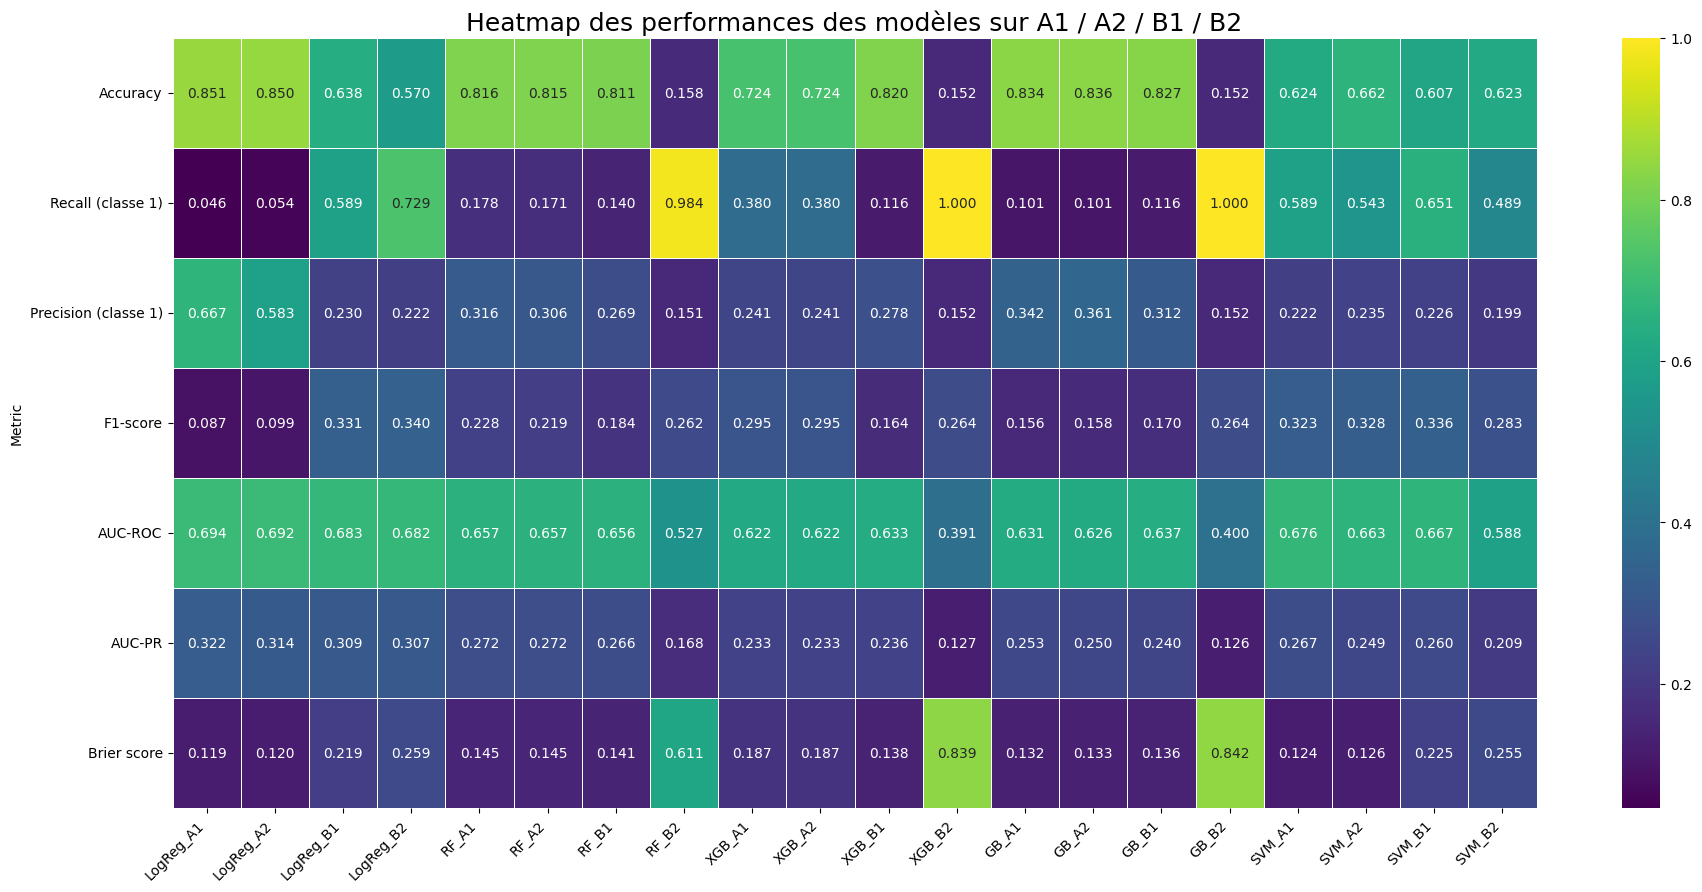

In [ ]:
##### matrice de heatmap des performances globales  #####
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# Exemple de structure du tableau global (à remplacer par tes valeurs)
# -------------------------------------------------------------------

df_perf = pd.DataFrame({
    "Metric": [
        "Accuracy", "Recall (classe 1)", "Precision (classe 1)", "F1-score",
        "AUC-ROC", "AUC-PR", "Brier score"
    ],
    
    "LogReg_A1":   [0.851, 0.046, 0.667, 0.087, 0.694, 0.322, 0.119],
    "LogReg_A2":   [0.850, 0.054, 0.583, 0.099, 0.692, 0.314, 0.120],
    "LogReg_B1":   [0.638, 0.589, 0.230, 0.331, 0.683, 0.309, 0.219],
    "LogReg_B2":   [0.570, 0.729, 0.222, 0.340, 0.682, 0.307, 0.259],

    "RF_A1":       [0.816, 0.178, 0.316, 0.228, 0.657, 0.272, 0.145],
    "RF_A2":       [0.815, 0.171, 0.306, 0.219, 0.657, 0.272, 0.145],
    "RF_B1":       [0.811, 0.140, 0.269, 0.184, 0.656, 0.266, 0.141],
    "RF_B2":       [0.158, 0.984, 0.151, 0.262, 0.527, 0.168, 0.611],

    "XGB_A1":      [0.724, 0.380, 0.241, 0.295, 0.622, 0.233, 0.187],
    "XGB_A2":      [0.724, 0.380, 0.241, 0.295, 0.622, 0.233, 0.187],
    "XGB_B1":      [0.820, 0.116, 0.278, 0.164, 0.633, 0.236, 0.138],
    "XGB_B2":      [0.152, 1.000, 0.152, 0.264, 0.391, 0.127, 0.839],

    "GB_A1":       [0.834, 0.101, 0.342, 0.156, 0.631, 0.253, 0.132],
    "GB_A2":       [0.836, 0.101, 0.361, 0.158, 0.626, 0.250, 0.133],
    "GB_B1":       [0.827, 0.116, 0.312, 0.170, 0.637, 0.240, 0.136],
    "GB_B2":       [0.152, 1.000, 0.152, 0.264, 0.400, 0.126, 0.842],

    "SVM_A1":      [0.624, 0.589, 0.222, 0.323, 0.676, 0.267, 0.124],
    "SVM_A2":      [0.662, 0.543, 0.235, 0.328, 0.663, 0.249, 0.126],
    "SVM_B1":      [0.607, 0.651, 0.226, 0.336, 0.667, 0.260, 0.225],
    "SVM_B2":      [0.623, 0.489, 0.199, 0.283, 0.588, 0.209, 0.255],
})

# Fixe la colonne Metric comme index
df_perf = df_perf.set_index("Metric")

# -------------------------------------------------------------------
# HEATMAP
# -------------------------------------------------------------------

plt.figure(figsize=(22, 10))
sns.heatmap(df_perf, annot=True, cmap="viridis", linewidths=.5, fmt=".3f")
plt.title("Heatmap des performances des modèles sur A1 / A2 / B1 / B2", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.show()
